# POS TAGGING WITH HIDDEN MARKOV MODELS USING SMOOTHING

Helpful Links:    
#### HMM  
https://etn-sas.eu/2020/09/23/part-of-speech-tagging-using-hidden-markov-models/  
https://web.stanford.edu/~jurafsky/slp3/A.pdf

#### POS Tagging
https://medium.com/@muddaprince456/categorizing-and-pos-tagging-with-nltk-python-28f2bc9312c3  
https://www.nltk.org/howto/corpus.html

#### Knesser Ney Smoothing
https://medium.com/@dennyc/a-simple-numerical-example-for-kneser-ney-smoothing-nlp-4600addf38b8

## POS Tagging

In [62]:
import nltk
from nltk.corpus import brown

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import re
import numpy as np
import pandas as pd

import operator

In [2]:
# Anonther way to POS Tag
# text = nltk.word_tokenize("And now for something completely different")
# nltk.pos_tag(text)

#### Importing Corpus Data

In [3]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [4]:
taggedWords = nltk.corpus.brown.tagged_words(tagset='universal', categories=['news', 'editorial', 'reviews'])
taggedWords

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [5]:
tagFrequency = nltk.FreqDist(tag for (word, tag) in taggedWords)
tagFrequency = list(tagFrequency.items())
tagFrequency

[('DET', 23525),
 ('NOUN', 56352),
 ('ADJ', 15218),
 ('VERB', 29773),
 ('ADP', 24800),
 ('.', 24381),
 ('ADV', 8429),
 ('CONJ', 6032),
 ('PRT', 4670),
 ('PRON', 6072),
 ('NUM', 3365),
 ('X', 245)]

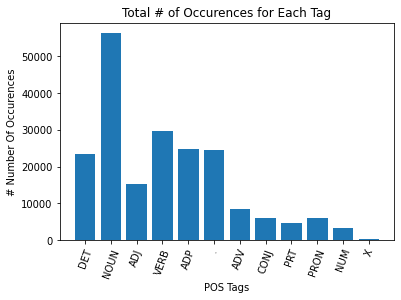

In [58]:
plt.bar(range(len(tagFrequency)), [val[1] for val in tagFrequency], align='center')
plt.xticks(range(len(tagFrequency)), [val[0] for val in tagFrequency])
plt.xticks(rotation=70)
plt.xlabel("POS Tags")
plt.ylabel("# Number Of Occurences")
plt.title("Total # of Occurences for Each Tag")
plt.show()

In [7]:
States = [tag[0] for tag in tagFrequency]
print(States)

['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X']


In [8]:
len(nltk.corpus.brown.tagged_sents(tagset='universal', categories=['news', 'editorial', 'reviews']))

9371

In [9]:
taggedSents = nltk.corpus.brown.tagged_sents(tagset='universal', categories=['news', 'editorial', 'reviews'])
taggedSents[:10]

[[('The', 'DET'),
  ('Fulton', 'NOUN'),
  ('County', 'NOUN'),
  ('Grand', 'ADJ'),
  ('Jury', 'NOUN'),
  ('said', 'VERB'),
  ('Friday', 'NOUN'),
  ('an', 'DET'),
  ('investigation', 'NOUN'),
  ('of', 'ADP'),
  ("Atlanta's", 'NOUN'),
  ('recent', 'ADJ'),
  ('primary', 'NOUN'),
  ('election', 'NOUN'),
  ('produced', 'VERB'),
  ('``', '.'),
  ('no', 'DET'),
  ('evidence', 'NOUN'),
  ("''", '.'),
  ('that', 'ADP'),
  ('any', 'DET'),
  ('irregularities', 'NOUN'),
  ('took', 'VERB'),
  ('place', 'NOUN'),
  ('.', '.')],
 [('The', 'DET'),
  ('jury', 'NOUN'),
  ('further', 'ADV'),
  ('said', 'VERB'),
  ('in', 'ADP'),
  ('term-end', 'NOUN'),
  ('presentments', 'NOUN'),
  ('that', 'ADP'),
  ('the', 'DET'),
  ('City', 'NOUN'),
  ('Executive', 'ADJ'),
  ('Committee', 'NOUN'),
  (',', '.'),
  ('which', 'DET'),
  ('had', 'VERB'),
  ('over-all', 'ADJ'),
  ('charge', 'NOUN'),
  ('of', 'ADP'),
  ('the', 'DET'),
  ('election', 'NOUN'),
  (',', '.'),
  ('``', '.'),
  ('deserves', 'VERB'),
  ('the', 'DET'),

In [10]:
# Checking if last sentence is equal to the words of last entry of list 
taggedSents[-1] == taggedWords[-(len(taggedSents[-1])):]

True

#### Test Train Split

In [11]:
# Shuffle the Training Set
taggedSents = shuffle(taggedSents, random_state=0)
taggedSents[:10]

[[('The', 'DET'),
  ('committee', 'NOUN'),
  ('for', 'ADP'),
  ('the', 'DET'),
  ('annual', 'ADJ'),
  ('Central', 'ADJ'),
  ('City', 'NOUN'),
  ('fashion', 'NOUN'),
  ('show', 'NOUN'),
  ('has', 'VERB'),
  ('been', 'VERB'),
  ('announced', 'VERB'),
  ('by', 'ADP'),
  ('Mrs.', 'NOUN'),
  ('D.', 'NOUN'),
  ('W.', 'NOUN'),
  ('Moore', 'NOUN'),
  (',', '.'),
  ('chairman', 'NOUN'),
  ('.', '.')],
 [('Premier', 'NOUN'),
  ('Khrushchev', 'NOUN'),
  ('wrecked', 'VERB'),
  ('the', 'DET'),
  ('conference', 'NOUN'),
  ('at', 'ADP'),
  ('its', 'DET'),
  ('initial', 'ADJ'),
  ('session', 'NOUN'),
  ('with', 'ADP'),
  ('a', 'DET'),
  ('bitter', 'ADJ'),
  ('denunciation', 'NOUN'),
  ('of', 'ADP'),
  ('the', 'DET'),
  ('U.', 'NOUN'),
  ('S.', 'NOUN'),
  ('for', 'ADP'),
  ('the', 'DET'),
  ('U-2', 'NOUN'),
  ('incident', 'NOUN'),
  ('.', '.')],
 [('they', 'PRON'),
  ('will', 'VERB'),
  ('be', 'VERB'),
  ('faithful', 'ADJ'),
  ('unto', 'ADP'),
  ('death', 'NOUN'),
  ('.', '.')],
 [('Neither', 'CONJ'),


In [12]:
# Seperating Tags from Words
Words, Tags = [], []
for index, sentence in enumerate(taggedSents):
    w, t = map(list, zip(*sentence))
    Words.append(w)
    Tags.append(t)

assert len(Words) == len(Tags)

In [13]:
# Test Train Split
split = int(len(taggedSents) * 0.8)
TrainWords = Words[:split]
TrainTags = Tags[:split]
TestWords = Words[split:]
TestTags = Tags[split:]

len(TrainWords), len(TrainTags), len(TestWords), len(TestTags)

(7496, 7496, 1875, 1875)

#### Creating Matrix A and B

In [14]:
# Bringing all words to lower case
lowerTrainWords = []
uniqueWords = set()
for s in TrainWords:
    sentenceList = []
    for i, w in enumerate(s):
        uniqueWords.add(w.lower())
        sentenceList.append(w.lower())
    lowerTrainWords.append(sentenceList)
TrainWords = lowerTrainWords[:]
TrainWords[:10]

[['the',
  'committee',
  'for',
  'the',
  'annual',
  'central',
  'city',
  'fashion',
  'show',
  'has',
  'been',
  'announced',
  'by',
  'mrs.',
  'd.',
  'w.',
  'moore',
  ',',
  'chairman',
  '.'],
 ['premier',
  'khrushchev',
  'wrecked',
  'the',
  'conference',
  'at',
  'its',
  'initial',
  'session',
  'with',
  'a',
  'bitter',
  'denunciation',
  'of',
  'the',
  'u.',
  's.',
  'for',
  'the',
  'u-2',
  'incident',
  '.'],
 ['they', 'will', 'be', 'faithful', 'unto', 'death', '.'],
 ['neither',
  'has',
  'congressman',
  'martin',
  'nor',
  'senator',
  'mcclellan',
  'been',
  'heard',
  'from',
  'on',
  'the',
  'matter',
  ';',
  ';'],
 ['to', 'a', 'novice', 'that', 'is', 'significant', '.'],
 ['then',
  'see',
  'what',
  'a',
  'boom',
  'in',
  'all',
  'trades',
  ',',
  'as',
  'well',
  'as',
  'slum',
  'clearance',
  'at',
  'no',
  'cost',
  'to',
  'taxpayers',
  ',',
  'will',
  'happen',
  '.'],
 ['eleven',
  'men',
  ',',
  'a',
  'woman',
  'and',

In [15]:
uniqueWords = list(uniqueWords)
len(uniqueWords)

18247

In [16]:
# Length of TrainingWords in a sentence are equal to the number of tags in a sentence
for i, s in enumerate(TrainWords):
    assert len(s) == len(TrainTags[i])

#### Emission Probability

In [17]:
# Using np.ones for Add-1 Smoothing
emissionProbability = pd.DataFrame(data = np.ones((len(States),len(uniqueWords))), index = States, columns = uniqueWords)
emissionProbability

,digging,officeholders,wholesale,vision,batter,5-to-1,grudges,isabel,unwelcome,unsuspecting,...,bestseller,pod,experience,depaul,cynics,two-run,museums,junction,secondary,itself
DET,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NOUN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
VERB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
.,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADV,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CONJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PRT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PRON,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
totalCount = 0
for i, s in enumerate(TrainWords):
    for j, w in enumerate(s):
        totalCount += 1
        emissionProbability.loc[TrainTags[i][j] , w] += 1
emissionProbability       

,digging,officeholders,wholesale,vision,batter,5-to-1,grudges,isabel,unwelcome,unsuspecting,...,bestseller,pod,experience,depaul,cynics,two-run,museums,junction,secondary,itself
DET,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NOUN,1.0,2.0,1.0,6.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,4.0,18.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0
ADJ,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0
VERB,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
.,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADV,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CONJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PRT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PRON,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,43.0


In [19]:
totalCount

162594

In [20]:
emissionProbability['Sum'] = emissionProbability.sum(axis = 1)
emissionProbability

,digging,officeholders,wholesale,vision,batter,5-to-1,grudges,isabel,unwelcome,unsuspecting,...,pod,experience,depaul,cynics,two-run,museums,junction,secondary,itself,Sum
DET,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,37115.0
NOUN,1.0,2.0,1.0,6.0,2.0,1.0,2.0,2.0,1.0,1.0,...,4.0,18.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,63423.0
ADJ,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,30502.0
VERB,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,42085.0
ADP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38154.0
.,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,37712.0
ADV,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24968.0
CONJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,23036.0
PRT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22026.0
PRON,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,43.0,23146.0


In [21]:
emissionProbability['Sum'].sum()

381558.0

In [22]:
emissionProbability = emissionProbability.iloc[:,:-1].div(emissionProbability["Sum"], axis=0)
emissionProbability

,digging,officeholders,wholesale,vision,batter,5-to-1,grudges,isabel,unwelcome,unsuspecting,...,bestseller,pod,experience,depaul,cynics,two-run,museums,junction,secondary,itself
DET,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
NOUN,0.000016,0.000032,0.000016,0.000095,0.000032,0.000016,0.000032,0.000032,0.000016,0.000016,...,0.000032,0.000063,0.000284,0.000032,0.000047,0.000016,0.000032,0.000032,0.000016,0.000016
ADJ,0.000033,0.000033,0.000066,0.000033,0.000033,0.000033,0.000033,0.000033,0.000066,0.000066,...,0.000033,0.000033,0.000033,0.000033,0.000033,0.000098,0.000033,0.000033,0.000098,0.000033
VERB,0.000048,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,...,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024
ADP,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,...,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026
.,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
ADV,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,...,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040
CONJ,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,...,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043
PRT,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,...,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045
PRON,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,...,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.001858


In [23]:
emissionProbability.sum(axis = 1)

DET     1.0
NOUN    1.0
ADJ     1.0
VERB    1.0
ADP     1.0
.       1.0
ADV     1.0
CONJ    1.0
PRT     1.0
PRON    1.0
NUM     1.0
X       1.0
dtype: float64

#### Transition Probability

In [24]:
totalTags = {}
for tagList in TrainTags:
    for tag in tagList:
        try:
            totalTags[tag] += 1
        except:
            totalTags[tag] = 1
totalTags

{'DET': 18868,
 'NOUN': 45176,
 'ADP': 19907,
 'ADJ': 12255,
 'VERB': 23838,
 '.': 19465,
 'PRON': 4899,
 'CONJ': 4789,
 'ADV': 6721,
 'PRT': 3779,
 'NUM': 2701,
 'X': 196}

In [25]:
transitionProbability = pd.DataFrame(data = np.ones((len(States),len(States))), index = States, columns = States)
transitionProbability

,DET,NOUN,ADJ,VERB,ADP,.,ADV,CONJ,PRT,PRON,NUM,X
DET,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NOUN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
VERB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
.,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADV,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CONJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PRT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PRON,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
sum(totalTags.values())

162594

In [27]:
for tagList in TrainTags:
    for i, tags in enumerate(tagList[1:]):
        transitionProbability.loc[tagList[i],tags] += 1
transitionProbability 

,DET,NOUN,ADJ,VERB,ADP,.,ADV,CONJ,PRT,PRON,NUM,X
DET,110.0,11709.0,4752.0,1107.0,169.0,228.0,345.0,10.0,31.0,137.0,249.0,31.0
NOUN,599.0,9958.0,738.0,6427.0,10051.0,11839.0,991.0,2310.0,771.0,774.0,453.0,20.0
ADJ,78.0,8280.0,752.0,191.0,970.0,1054.0,95.0,390.0,227.0,34.0,171.0,9.0
VERB,4199.0,2728.0,1403.0,4687.0,3889.0,1672.0,2183.0,277.0,1544.0,892.0,316.0,6.0
ADP,8879.0,5738.0,1675.0,757.0,395.0,203.0,262.0,29.0,231.0,911.0,827.0,11.0
.,1499.0,2319.0,666.0,1636.0,1366.0,1700.0,769.0,1106.0,258.0,758.0,274.0,20.0
ADV,541.0,272.0,1038.0,1721.0,934.0,925.0,637.0,87.0,213.0,238.0,113.0,3.0
CONJ,741.0,1430.0,596.0,755.0,314.0,99.0,393.0,4.0,111.0,264.0,91.0,3.0
PRT,317.0,154.0,72.0,2485.0,337.0,173.0,131.0,32.0,36.0,14.0,34.0,1.0
PRON,75.0,46.0,45.0,3635.0,238.0,373.0,285.0,60.0,109.0,38.0,4.0,1.0


In [28]:
transitionProbability.sum(axis = 1).sum()

155242.0

In [30]:
for i in transitionProbability.index:
    transitionProbability.loc[i,:] = transitionProbability.loc[i,:].div(totalTags[i], axis = 0)
    
transitionProbability

,DET,NOUN,ADJ,VERB,ADP,.,ADV,CONJ,PRT,PRON,NUM,X
DET,0.005830,0.620575,0.251855,0.058671,0.008957,0.012084,0.018285,0.000530,0.001643,0.007261,0.013197,0.001643
NOUN,0.013259,0.220427,0.016336,0.142266,0.222485,0.262064,0.021936,0.051133,0.017067,0.017133,0.010027,0.000443
ADJ,0.006365,0.675643,0.061363,0.015585,0.079151,0.086006,0.007752,0.031824,0.018523,0.002774,0.013953,0.000734
VERB,0.176147,0.114439,0.058856,0.196619,0.163143,0.070140,0.091576,0.011620,0.064771,0.037419,0.013256,0.000252
ADP,0.446024,0.288240,0.084141,0.038027,0.019842,0.010197,0.013161,0.001457,0.011604,0.045763,0.041543,0.000553
.,0.077010,0.119137,0.034215,0.084048,0.070177,0.087336,0.039507,0.056820,0.013255,0.038942,0.014077,0.001027
ADV,0.080494,0.040470,0.154441,0.256063,0.138967,0.137628,0.094778,0.012945,0.031692,0.035411,0.016813,0.000446
CONJ,0.154730,0.298601,0.124452,0.157653,0.065567,0.020672,0.082063,0.000835,0.023178,0.055126,0.019002,0.000626
PRT,0.083885,0.040752,0.019053,0.657581,0.089177,0.045779,0.034665,0.008468,0.009526,0.003705,0.008997,0.000265
PRON,0.015309,0.009390,0.009186,0.741988,0.048581,0.076138,0.058175,0.012247,0.022249,0.007757,0.000816,0.000204


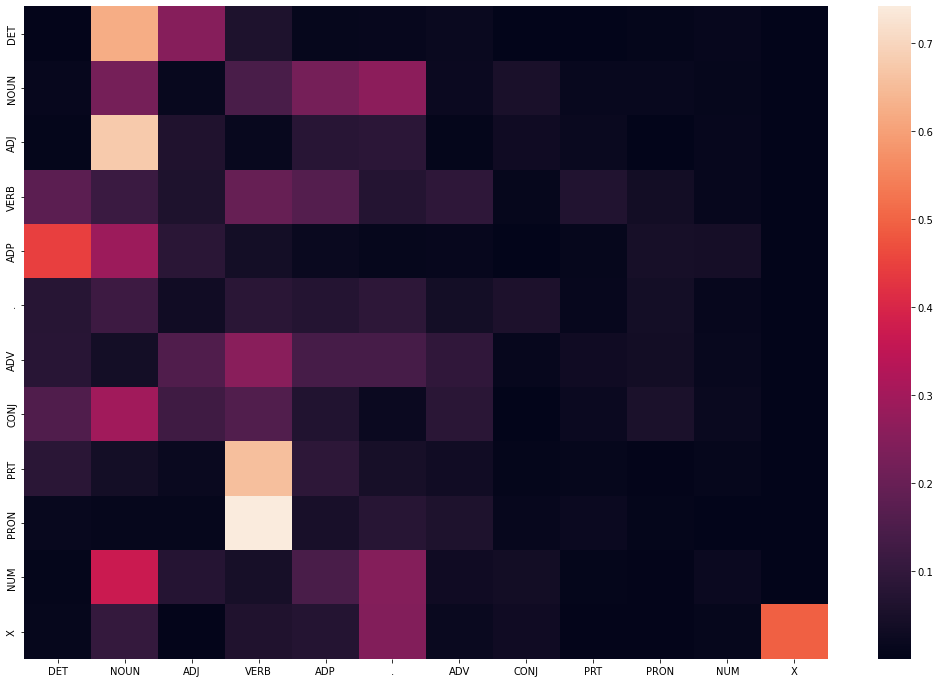

In [63]:
plt.figure(figsize=(18, 12))
sns.heatmap(transitionProbability)
plt.show()

#### Pi Distribution

In [31]:
Pi = {}
for tag in TrainTags:
    try:
        Pi[tag[0]] += 1
    except:
        Pi[tag[0]] = 1

for s in Pi.keys():
    Pi[s] = round(Pi[s]/(len(TrainTags)),6)

Pi

{'DET': 0.242396,
 'NOUN': 0.204909,
 'PRON': 0.111393,
 'CONJ': 0.052561,
 'ADP': 0.114328,
 'ADV': 0.073906,
 'NUM': 0.016009,
 'ADJ': 0.044023,
 '.': 0.065902,
 'PRT': 0.031884,
 'VERB': 0.042156,
 'X': 0.000534}

In [32]:
sum(Pi.values())

1.0000010000000001

## Hidden Markov Models 

In [ ]:
# uniqueObservations = ['e','p','f']
# Observations = ['g','f', 'f']
# States = ['P', 'E', 'F']
# state2Index = dict(zip(States, list(range(len(States)))))

# print(state2Index)


# Pi = {
#     "E" : 1,
#     "P" : 1,
#     "F" : 1,
# }

# sum(Pi.values())

# A = np.array([[0.11, 0.63, 0.26],[0.5, 0.1, 0.4],[0.71, 0.25, 0.035]])
# A


# B = np.array([[0.05, 0.8, 0.15],[0.7, 0.1, 0.2],[0.30, 0.1, 0.6]])
# B

# A = pd.DataFrame(data = A, columns = States, index= States)
# A

# B = pd.DataFrame(data = B, columns = uniqueObservations , index= States)
# display(A, B)

In [33]:
uniqueObservations = list(emissionProbability.columns)
uniqueObservations[:15]

['digging',
 'officeholders',
 'wholesale',
 'vision',
 'batter',
 '5-to-1',
 'grudges',
 'isabel',
 'unwelcome',
 'unsuspecting',
 'export',
 'russian',
 'inhibited',
 'ornament',
 'transcended']

In [34]:
States = list(transitionProbability.index)
States

['DET',
 'NOUN',
 'ADJ',
 'VERB',
 'ADP',
 '.',
 'ADV',
 'CONJ',
 'PRT',
 'PRON',
 'NUM',
 'X']

In [35]:
state2Index = dict(zip(States, list(range(len(States)))))
state2Index

{'DET': 0,
 'NOUN': 1,
 'ADJ': 2,
 'VERB': 3,
 'ADP': 4,
 '.': 5,
 'ADV': 6,
 'CONJ': 7,
 'PRT': 8,
 'PRON': 9,
 'NUM': 10,
 'X': 11}

In [36]:
A = pd.DataFrame(data = transitionProbability.values, columns = States, index= States)
A

,DET,NOUN,ADJ,VERB,ADP,.,ADV,CONJ,PRT,PRON,NUM,X
DET,0.005830,0.620575,0.251855,0.058671,0.008957,0.012084,0.018285,0.000530,0.001643,0.007261,0.013197,0.001643
NOUN,0.013259,0.220427,0.016336,0.142266,0.222485,0.262064,0.021936,0.051133,0.017067,0.017133,0.010027,0.000443
ADJ,0.006365,0.675643,0.061363,0.015585,0.079151,0.086006,0.007752,0.031824,0.018523,0.002774,0.013953,0.000734
VERB,0.176147,0.114439,0.058856,0.196619,0.163143,0.070140,0.091576,0.011620,0.064771,0.037419,0.013256,0.000252
ADP,0.446024,0.288240,0.084141,0.038027,0.019842,0.010197,0.013161,0.001457,0.011604,0.045763,0.041543,0.000553
.,0.077010,0.119137,0.034215,0.084048,0.070177,0.087336,0.039507,0.056820,0.013255,0.038942,0.014077,0.001027
ADV,0.080494,0.040470,0.154441,0.256063,0.138967,0.137628,0.094778,0.012945,0.031692,0.035411,0.016813,0.000446
CONJ,0.154730,0.298601,0.124452,0.157653,0.065567,0.020672,0.082063,0.000835,0.023178,0.055126,0.019002,0.000626
PRT,0.083885,0.040752,0.019053,0.657581,0.089177,0.045779,0.034665,0.008468,0.009526,0.003705,0.008997,0.000265
PRON,0.015309,0.009390,0.009186,0.741988,0.048581,0.076138,0.058175,0.012247,0.022249,0.007757,0.000816,0.000204


In [37]:
B = pd.DataFrame(data = emissionProbability.values, columns = uniqueObservations , index= States)
B

,digging,officeholders,wholesale,vision,batter,5-to-1,grudges,isabel,unwelcome,unsuspecting,...,bestseller,pod,experience,depaul,cynics,two-run,museums,junction,secondary,itself
DET,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
NOUN,0.000016,0.000032,0.000016,0.000095,0.000032,0.000016,0.000032,0.000032,0.000016,0.000016,...,0.000032,0.000063,0.000284,0.000032,0.000047,0.000016,0.000032,0.000032,0.000016,0.000016
ADJ,0.000033,0.000033,0.000066,0.000033,0.000033,0.000033,0.000033,0.000033,0.000066,0.000066,...,0.000033,0.000033,0.000033,0.000033,0.000033,0.000098,0.000033,0.000033,0.000098,0.000033
VERB,0.000048,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,...,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024
ADP,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,...,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026,0.000026
.,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
ADV,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,...,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040
CONJ,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,...,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043
PRT,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,...,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045
PRON,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,...,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.001858


In [38]:
class HMM:
    def __init__(self, Q, O, A, B, Pi):
        """
        Q are the unique states.
        O is the observaion sequence.
        N is the total number of States.
        T is the total number of Observations.
        
        A is the Transition Probability between the States.
        B is the Emission/Observed Probability.
        Pi is the Initial Probability Distribution that the Markov chain will start in State j.
        
         V is the Viterbi Matrix.
        Backpointer is the previous max prob path.
        
        bestPath is the most probable sequence of hidden states given the 
        """
        self.Q = Q
        self.O = O
        self.N = len(Q)
        self.T = len(O)
        
        self.A = A
        self.B = B
        self.Pi = Pi
   
        self.V = pd.DataFrame(data = np.zeros((len(self.Q),len(self.O))), index = self.Q, columns = self.O)
        self.backPointer = pd.DataFrame(data = None, index = self.Q, columns = self.O)
        
        self.bestPath = []
        self.bestProb = None
        
    def showViterbi(self,):
        display('V', self.V)
    def showBackPointer(self,):
        display('Back Pointer', self.backPointer)
        

    def initialization(self,):
        
#         assert sum(self.Pi.values()) == 1
        
        for S in self.Q:
            a = self.Pi[S]
            try:
                b = self.B.loc[S,self.O[0]]
            except:
                b = 0
            self.V.loc[S,self.O[0]] = a * b if b!=0 else a
        
#         self.showViterbi()
    
    def recursion(self,):
        for t in range(1,self.T):
            for S in self.Q:
                maxCandidates = {}
                for S_prime in self.Q:
                    a = self.V.iloc[state2Index[S_prime], t-1] * self.A.iloc[state2Index[S_prime], state2Index[S]]
                    try:
                        b = self.B.iloc[state2Index[S], uniqueObservations.index(self.O[t])]
                    except:
                        b = 0
                    maxCandidates[S_prime] =  a * b if b!=0 else a
                maxProbPath = max(maxCandidates.items(), key=operator.itemgetter(1))[0]
                
                self.V.iloc[state2Index[S], t] = maxCandidates[maxProbPath]
                self.backPointer.iloc[state2Index[S], t] = maxProbPath
        
#         self.showViterbi()
#         self.showBackPointer()
        
    def termination(self,):
        self.bestProb = self.V.iloc[:,-1].max()
        
        self.bestPath.append(self.V.iloc[:,-1].idxmax())
        for t in range(self.T-1, 0, -1):
            p = self.backPointer.iloc[state2Index[self.bestPath[-1]], t]
            self.bestPath.append(p)
            
        self.bestPath = self.bestPath[::-1]
        
        return self.bestProb, self.bestPath
            
    def solve(self,):
        self.initialization()
        self.recursion()
        return self.termination()
            
        

In [39]:
assert len(TrainWords[0]) == len(TrainTags[0])
Observations = TrainWords[0]
print(TrainWords[0], TrainTags[0])

['the', 'committee', 'for', 'the', 'annual', 'central', 'city', 'fashion', 'show', 'has', 'been', 'announced', 'by', 'mrs.', 'd.', 'w.', 'moore', ',', 'chairman', '.'] ['DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'ADJ', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'VERB', 'VERB', 'ADP', 'NOUN', 'NOUN', 'NOUN', 'NOUN', '.', 'NOUN', '.']


In [40]:
lamda = HMM(States, Observations, A, B, Pi)
PROB, PATH = lamda.solve()
print(PROB, PATH)

1.0880827352362872e-60 ['DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'ADJ', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'VERB', 'VERB', 'ADP', 'NOUN', 'NOUN', 'NOUN', 'NOUN', '.', 'NOUN', '.']


In [41]:
# Test a training sample
assert len(TrainTags[0]) == len(PATH)
c = 0
for i in range(len(TrainTags[0])):
    if TrainTags[0][i] == PATH[i]:
        c += 1
str((c/len(PATH))*100) + "%"

'100.0%'

## Evaluation

In [42]:
len(TestWords[258]) == len(TestTags[258])

True

In [43]:
lowerTestWords = []
for s in TestWords:
    sentenceList = []
    for i, w in enumerate(s):
        sentenceList.append(w.lower())
    lowerTestWords.append(sentenceList)
TestWords = lowerTestWords[:]
TestWords[:10]

[['he',
  'said',
  'mitchell',
  'is',
  'against',
  'the',
  'centralization',
  'of',
  'government',
  'in',
  'washington',
  'but',
  'looks',
  'to',
  'the',
  'kennedy',
  'administration',
  'for',
  'aid',
  'to',
  'meet',
  'new',
  'jersey',
  'school',
  'and',
  'transportation',
  'crises',
  '.'],
 ['a',
  '60',
  'mm.',
  'mortar',
  'and',
  'a',
  '57',
  'mm.',
  'recoilless',
  'rifle',
  'owned',
  'by',
  'lauchli',
  'were',
  'brought',
  'along',
  '.'],
 ['the',
  'other',
  'occupants',
  'were',
  'james',
  'willard',
  'olvey',
  ',',
  '18',
  ',',
  'of',
  '963',
  'ponce',
  'de',
  'leon',
  'ave.',
  ',',
  'ne',
  ',',
  'and',
  'larry',
  'coleman',
  'barnett',
  ',',
  '19',
  ',',
  'of',
  '704',
  'hill',
  'st.',
  ',',
  'se',
  ',',
  'both',
  'of',
  'whom',
  'were',
  'treated',
  'at',
  'grady',
  'hospital',
  'for',
  'severe',
  'lacerations',
  'and',
  'bruises',
  '.'],
 ['against',
  'the',
  'dramatic',
  'fight',
  'bein

In [44]:
totalTags = {}
for tagList in TestTags:
    for tag in tagList:
        try:
            totalTags[tag] += 1
        except:
            totalTags[tag] = 1
totalTags

{'PRON': 1173,
 'VERB': 5935,
 'NOUN': 11176,
 'ADP': 4893,
 'DET': 4657,
 'CONJ': 1243,
 'PRT': 891,
 'ADJ': 2963,
 '.': 4916,
 'NUM': 664,
 'ADV': 1708,
 'X': 49}

In [45]:
for i, s in enumerate(TestWords):
    assert len(s) == len(TestTags[i])

In [46]:
def checkAccuracyOfTag(Tags, Path, States):
    
    tempDict = dict((k,0) for k in States)
    
    assert len(Tags) == len(Path)
    c = 0
    for i in range(len(Tags)):
        if Tags[i] == Path[i]:
            tempDict[Tags[i]] += 1
            c += 1
    return c, len(Tags), tempDict


def addDicts(dict1, dict2):
    for key, value in dict2.items():
        dict1[key] += value
    return dict1

In [47]:
correct, total = 0, 0
predictedTags = dict((k,0) for k in States)

for i, w in enumerate(TestWords):
    Observations = w
    lamda = HMM(States, Observations, A, B, Pi)
    PROB, PATH = lamda.solve()
    
    c, t, dict2 = checkAccuracyOfTag(TestTags[i], PATH, States)
    correct += c
    total += t
    
    predictedTags = addDicts(predictedTags, dict2)

In [48]:
Accuracy = (correct/total) * 100
Accuracy

90.54584285288566

In [49]:
correct, total

(36461, 40268)

In [50]:
predictedTags

{'DET': 4599,
 'NOUN': 9993,
 'ADJ': 2355,
 'VERB': 5004,
 'ADP': 4787,
 '.': 4914,
 'ADV': 1314,
 'CONJ': 1233,
 'PRT': 696,
 'PRON': 1089,
 'NUM': 466,
 'X': 11}

In [54]:
for key, value in totalTags.items():
        predictedTags[key] /= value
predictedTags

{'DET': 0.9875456302340563,
 'NOUN': 0.8941481746599856,
 'ADJ': 0.7948025649679379,
 'VERB': 0.8431339511373209,
 'ADP': 0.9783363989372573,
 '.': 0.999593165174939,
 'ADV': 0.7693208430913349,
 'CONJ': 0.9919549477071601,
 'PRT': 0.7811447811447811,
 'PRON': 0.928388746803069,
 'NUM': 0.7018072289156626,
 'X': 0.22448979591836735}

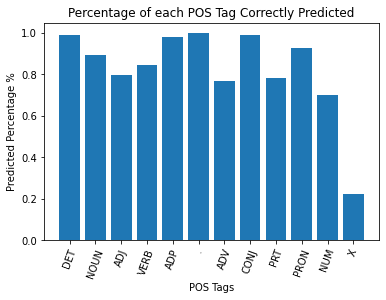

In [57]:
plt.bar(predictedTags.keys(), predictedTags.values())
plt.xticks(rotation=70)
plt.xlabel("POS Tags")
plt.ylabel("Predicted Percentage %")
plt.title("Percentage of each POS Tag Correctly Predicted")
plt.show()

#### Visualization

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]

# X_axis = np.arange(len(X))

# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')

# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()


### Kneser-Ney Smoothing Algorithm

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# def showImage(x):    
#     plt.figure(figsize=(20,12))
#     img = mpimg.imread(str(x) + '.PNG')
#     plt.imshow(img)
# showImage(1)

In [ ]:
# import nltk
# import re
# from collections import Counter

# exampleText = "Paragraphs are the building blocks of papers. Many students define paragraphs in terms of length: a paragraph is a group of at least five sentences, a paragraph is half a page long, etc. In reality, though, the unity and coherence of ideas among sentences is what constitutes a paragraph. A paragraph is defined as “a group of sentences or a single sentence that forms a unit”. Length and appearance do not determine whether a section in a paper is a paragraph. For instance, in some styles of writing, particularly journalistic styles, a paragraph can be just one sentence long. Ultimately, a paragraph is a sentence or group of sentences that support one main idea. In this handout, we will refer to this as the “controlling idea,” because it controls what happens in the rest of the paragraph."


# exampleText = exampleText.lower()
# exampleText

# exampleText = nltk.word_tokenize(exampleText)
# Unigrams = Counter(exampleText)
# Unigrams.most_common()

# Bigrams = nltk.bigrams(exampleText)
# Bigrams = nltk.FreqDist(Bigrams)
# Bigrams = sorted(Bigrams.items(), key=lambda x: x[1], reverse=True)
# Bigrams

In [ ]:
# def firstTerm(prevWord, currWord, d, Unigrams, Bigrams):
#         countPrev, countCurrent, countTypes, countPrceded = 0, 0, 0, 0
#         for k,v in Bigrams:
#             if list(k)[0] == prevWord:
#                 countPrev += v
#                 countTypes += 1
#                 if list(k)[1] == currWord:
#                     countCurrent+=v
#             if list(k)[1] == currWord:
#                 countPrceded += 1
#         return max(((countCurrent-d)/countPrev), 0), countTypes, countPrev, countPrceded

# def lamda(countTypes, countPrev, d):
#     return (d*countTypes)/countPrev

# def PContinuation(countPrceded, Bigrams):
#     return countPrceded/(len(Bigrams))

# def knesserNeySmoothing(prevWord, currWord, Unigrams, Bigrams):
    
#     d = 0.75
#     a, countTypes, countPrev, countPrceded = firstTerm(prevWord, currWord, d, Unigrams, Bigrams)
#     b = lamda(countTypes, countPrev, d)
#     c = PContinuation(countPrceded, Bigrams)
    
#     knesser = a + (b*c)
#     addOne = 1/len(Unigrams)
    
#     return addOne if knesser == 0 else knesser

# knesserNeySmoothing(prevWord, currWord, Unigrams, Bigrams)